**Assignment**

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to student performances in exams?
2. Are there any differences between the lunch types with respect to student performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which two exam scores are most correlated with each other?

# Imports

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from scipy.stats import f_oneway as anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey

%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
%reload_ext nb_black
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
query = """
SELECT *
FROM studentsperformance
"""
df = pd.read_sql_query(query, con=conn_str)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Are there any differences between the genders, ethnicities, and parental level of education with respect to student performances in exams?

## genders

In [4]:
gender_df = df[["gender", "math score", "reading score", "writing score"]]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
gender_df.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

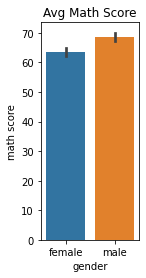

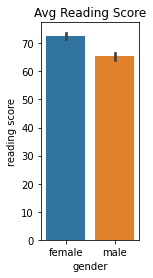

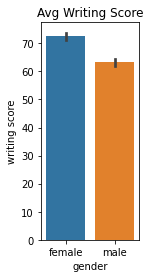

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# bar plots of all the scores by gender
plt.subplot(1, 3, 1)
sns.barplot(gender_df.gender, gender_df["math score"])
plt.title("Avg Math Score")
plt.show()

plt.subplot(1, 3, 2)
sns.barplot(gender_df.gender, gender_df["reading score"])
plt.title("Avg Reading Score")
plt.show()

plt.subplot(1, 3, 3)
sns.barplot(gender_df.gender, gender_df["writing score"])
plt.title("Avg Writing Score")
plt.show()

> the female group seems to score higher in both reading and writing, and lower in math
---

In [13]:
# run t-tests on the different scores by gender
scores = ["math score", "reading score", "writing score"]

for score in scores:
    print(score)
    print(
        stats.ttest_ind(
            gender_df[gender_df.gender == "male"][score],
            gender_df[gender_df.gender == "female"][score],
        )
    )

math score
Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)
reading score
Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)
writing score
Ttest_indResult(statistic=-9.979557910004507, pvalue=2.019877706867934e-22)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> There seems to be a significant difference in scores by gender
---

## Ethnicities

In [19]:
# create df just with vars of interest
race_df = df[["race/ethnicity", "math score", "reading score", "writing score"]]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# check differences in mean by race
race_df.groupby("race/ethnicity").mean().style.background_gradient()


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# run t-tests between groups
# var for all race types
races = df["race/ethnicity"].unique()
grouped_df = race_df.groupby("race/ethnicity")
scores = ["math score", "reading score", "writing score"]

for score in scores:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(score))
    print("------------------------------------------------")
    for i in range(0, len(races)):
        for j in range(i + 1, len(races)):
            t, p = stats.ttest_ind(
                race_df[race_df["race/ethnicity"] == races[i]][score],
                race_df[race_df["race/ethnicity"] == races[j]][score],
            )
            if p < 0.05:
                print("t-test groups {0} and {1}".format(races[i], races[j]))
                print(
                    stats.ttest_ind(
                        race_df[race_df["race/ethnicity"] == races[i]][score],
                        race_df[race_df["race/ethnicity"] == races[j]][score],
                    )
                )

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test groups group B and group D
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test groups group B and group E
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test groups group C and group D
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test groups group C and group E
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test groups group A and group D
Ttest_indResult(statistic=-3.3466982429712298, pvalue=0.0009068636053543751)
t-test groups group A and group E
Ttest_indResult(statistic=-5.936141025544798, pvalue=1.083559122656415e-08)
t-test groups group D and group E
Ttest_indResult(statistic=-4.282287214674715, pvalue=2.3187640326715042e-05)
------------------------------------------------
Comparisons for variable: reading score
--------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Parental Education

In [39]:
parent_df = df[
    ["parental level of education", "math score", "reading score", "writing score"]
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
df.groupby("parental level of education").mean()[
    ["math score", "reading score", "writing score"]
].style.background_gradient()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# run t-tests between groups
# var for all race types
parent_ed = df["parental level of education"].unique()
grouped_df = parent_df.groupby("parental level of education")
scores = ["math score", "reading score", "writing score"]

for score in scores:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(score))
    print("------------------------------------------------")
    for i in range(0, len(parent_ed)):
        for j in range(i + 1, len(parent_ed)):
            t, p = stats.ttest_ind(
                parent_df[parent_df["parental level of education"] == parent_ed[i]][
                    score
                ],
                parent_df[parent_df["parental level of education"] == parent_ed[j]][
                    score
                ],
            )
            if p < 0.05:
                print("t-test groups {0} and {1}".format(parent_ed[i], parent_ed[j]))
                print(
                    stats.ttest_ind(
                        parent_df[
                            parent_df["parental level of education"] == parent_ed[i]
                        ][score],
                        parent_df[
                            parent_df["parental level of education"] == parent_ed[j]
                        ][score],
                    )
                )

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test groups bachelor's degree and high school
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test groups bachelor's degree and some high school
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test groups some college and high school
Ttest_indResult(statistic=3.5461079495681163, pvalue=0.00043498004192453146)
t-test groups some college and some high school
Ttest_indResult(statistic=2.4117046231407633, pvalue=0.016324361572645503)
t-test groups master's degree and high school
Ttest_indResult(statistic=3.4893759321890823, pvalue=0.000570929230228812)
t-test groups master's degree and some high school
Ttest_indResult(statistic=2.6442572081925526, pvalue=0.008736228790471057)
t-test groups associate's degree and high school
Ttest_indResult(statistic=3.9481325318265013, pvalue=9.247314274963044e-05

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Does the test preparation course seem to have an effect on the exam performances?

In [49]:
prep_df = df[
    ["test preparation course", "math score", "reading score", "writing score"]
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
prep_df.groupby("test preparation course").mean().style.background_gradient()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
for score in scores:
    print(score)
    print(
        stats.ttest_ind(
            prep_df[prep_df["test preparation course"] == "completed"][score],
            prep_df[prep_df["test preparation course"] == "none"][score],
        )
    )

math score
Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)
reading score
Ttest_indResult(statistic=7.871663538941468, pvalue=9.081783336892205e-15)
writing score
Ttest_indResult(statistic=10.409173436808748, pvalue=3.68529173524572e-24)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> the test prep course did have an effect on performance on all scores
---

# Which two exam scores are most correlated with each other?

In [57]:
df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> writing and reading are most correlated
---